In [1]:
import collections, numpy as np, pandas as pd, matplotlib, matplotlib.pyplot as plt, seaborn as sns, matplotlib_venn, upsetplot
from af2genomics import *

In [2]:
df_ = pd.read_csv('23.10.18_af2_pos.tsv', sep='\t')
df_.head(3).transpose()

,0,1,2
uniprot_id,A0A024R1R8,A0A024R1R8,A0A024R1R8
pos,1,2,3
pos_pLDDT,59.87,55.91,62.74
pos_coverage,none,none,none


In [3]:
df_['pos_pLDDT_bin'] = pd.cut(x=df_['pos_pLDDT'], bins=pLDDT_bins, labels=pLDDT_palette.keys())
df_['pos_pLDDT_bin'].value_counts()

Very high (pLDDT > 90)    4064065
Very low (pLDDT ≤ 50)     2890882
High (90 ≥ pLDDT > 70)    2545348
Low (70 ≥ pLDDT > 50)     1036971
Name: pos_pLDDT_bin, dtype: int64

In [4]:
df_plt_ = df_.groupby(['pos_coverage', 'pos_pLDDT_bin']).size()
df_plt_.name='size'
df_plt_

pos_coverage  pos_pLDDT_bin         
PDB           Very low (pLDDT ≤ 50)       89861
              Low (70 ≥ pLDDT > 50)      115663
              High (90 ≥ pLDDT > 70)     545419
              Very high (pLDDT > 90)    1442820
SWISSMODEL    Very low (pLDDT ≤ 50)      196056
              Low (70 ≥ pLDDT > 50)      220076
              High (90 ≥ pLDDT > 70)    1050344
              Very high (pLDDT > 90)    1952348
none          Very low (pLDDT ≤ 50)     2604965
              Low (70 ≥ pLDDT > 50)      701232
              High (90 ≥ pLDDT > 70)     949585
              Very high (pLDDT > 90)     668897
Name: size, dtype: int64

<AxesSubplot: xlabel='Count', ylabel='pos_coverage'>

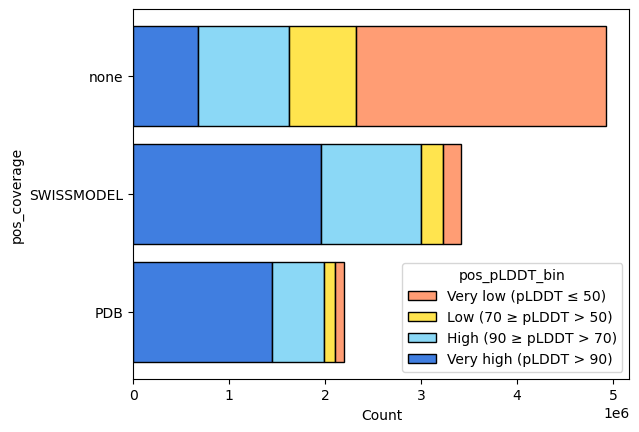

In [5]:
sns.histplot(df_, y='pos_coverage', hue='pos_pLDDT_bin', multiple='stack', shrink=.85, palette=pLDDT_palette)

In [6]:
def apply_(r):
    if r.pos_coverage in ['PDB', 'SWISSMODEL']:
        return r.pos_coverage
    elif r.pos_pLDDT_bin in ['High (90 ≥ pLDDT > 70)', 'Very high (pLDDT > 90)']:
        return 'AF2: High/Very high (pLDDT > 70)'
    else:
        return f'AF2: {r.pos_pLDDT_bin}'

df_pie_ = df_plt_.reset_index()
df_pie_['label'] = df_pie_.apply(apply_, axis=1)
df_pie_ = df_pie_.groupby(['label']).agg(size=('size', np.sum))
df_pie_

,size
label,
AF2: High/Very high (pLDDT > 70),1618482
AF2: Low (70 ≥ pLDDT > 50),701232
AF2: Very low (pLDDT ≤ 50),2604965
PDB,2193763
SWISSMODEL,3418824


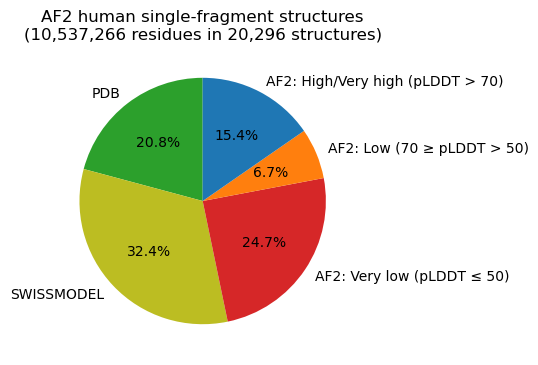

In [7]:
order_ = collections.OrderedDict([
    ('PDB', 'tab:green'), 
    ('SWISSMODEL', 'tab:olive'), 
    ('AF2: Very low (pLDDT ≤ 50)', 'tab:red'), 
    ('AF2: Low (70 ≥ pLDDT > 50)', 'tab:orange'), 
    ('AF2: High/Very high (pLDDT > 70)', 'tab:blue'),
])

df_pie_.loc[order_.keys()].plot.pie(y='size', startangle=90, legend=False, colors=order_.values(), autopct='%.1f%%', figsize=(6, 4))#.legend(bbox_to_anchor=(1.0, .5))
n_struct = df_['uniprot_id'].nunique()
n_resid = df_pie_.sum().squeeze()
plt.title(f'AF2 human single-fragment structures\n({uf(n_resid)} residues in {uf(n_struct)} structures)')
plt.gca().set_ylabel('')
#plt.savefig('af2_coverage.png', bbox_inches='tight', transparent=True)
plt.savefig('af2_coverage.svg', bbox_inches='tight', transparent=True)